# Буканов Никита, Лабораторная работа №5

In [55]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np

# Задание №1

Жидкие продукты разливается в пакеты на линии упаковки. Затраты на подвоз 700 у.е. Совокупная потребность в этих продуктах составляет 140 000 литров в месяц. Стоимость хранения 1 литра в течение месяца составляет 4 у.е. Определить оптимальные параметры пополнения склада цеха разлива и сравнить с действующей системой разлива одного продукта в течение трех дней. Хватит ли сэкономленных денег на достойную оплату «прикладного математика»? Проиллюстрировать графически состояние «запаса (склада)» в обоих случаях.

$v$ - скорость расходования товара

$k$ - стоимость пополнения товара

$S$ - затраты на хранение еденицы товара на складе

$q$ - количество завозимого товара

$\tau = \frac{q}{v} $ - время продажи одного завоза

Рaсходы:
   1. Пополнение
   2. хранение $\int_0^{\tau}{Sq(t)dt}$ = $\frac{1}{2}S \tau q$
  
$C = \frac{Kv}{q} + \frac{1}{2}Sq$

$q^* = \sqrt{\frac{2Kv}{S}}$

## Оптимальные параметры

In [56]:
K = 700
s = 4/30
v = 140000/30
P = 5/30

In [57]:
q = np.sqrt((2*K*v)/s)
tau = q/v
L = q*s

In [58]:
print("Размер партии = %0.1f, Заказ нужно делать каждые = %0.1f, Затраты = %0.1f"%(q, tau, L*30))

Размер партии = 7000.0, Заказ нужно делать каждые = 1.5, Затраты = 28000.0


## Действующая система

In [59]:
print("Размер партии = %0.1f, Заказ нужно делать каждые = %0.1f, Затраты = %0.1f"%(0.1*140000, 3, 700*140000/14000 + 4*14000/2))

Размер партии = 14000.0, Заказ нужно делать каждые = 3.0, Затраты = 35000.0


## Моделирование

In [60]:
q1 = 14000
p = 300
t_array = np.linspace(0, 15, 1501)
v_array = np.zeros_like(t_array)
for i in range(p):
    v_array[i::p] = q1*(1 - i/p)
    
p = int(100*tau)
v1_array = np.zeros_like(t_array)
for i in range(p):
    v1_array[i::p] = q*(1 - i/p) 

<IPython.core.display.Javascript object>


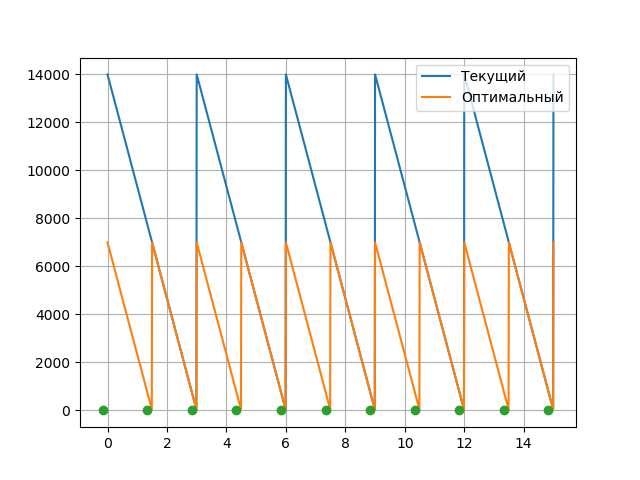

In [61]:
P = 5/30
plt.figure()
plt.grid()
plt.plot(t_array, v_array)
plt.plot(t_array, v1_array)
plt.plot((t_array-P)[::p], [0]*len(t_array[::p]), 'o')
plt.legend(['Текущий', 'Оптимальный'])

# Задание №2

Модифицировать условие задачи 1, учитывая протяженное во времени поступление жидкого продукта (по трубопроводу) на линию упаковки. Параметры задать самостоятельно.

In [62]:
K = 700
s = 4/30
v = 140000/30
l = v*14

In [63]:
q = np.sqrt(2*K*v/s)*1/np.sqrt(1-v/l)
tau = np.sqrt(2*K/(s*v)*1/np.sqrt(1-v/l))
tau_1 = q/l
tau_2 = tau - tau_1
q, tau, tau_1, tau_2

(7264.243303278793, 1.528049523897203, 0.1111873974991652, 1.4168621263980377)

In [64]:
t_array = np.arange(0, 20, tau/10)
v_array = np.zeros_like(t_array)
for i in range(11):
    v_array[i::10] = q*(1-i/10) 

<IPython.core.display.Javascript object>


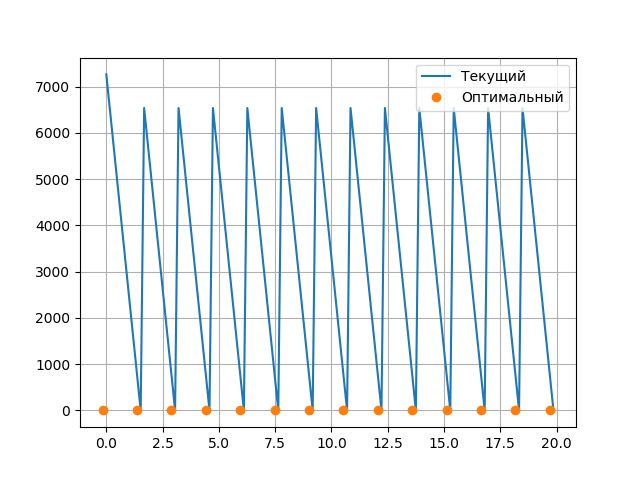

In [65]:
plt.figure()
plt.grid()
plt.plot(t_array, v_array)
p = 10
plt.plot((t_array-P)[::p], [0]*len(t_array[::p]), 'o')
plt.legend(['Текущий', 'Оптимальный'])

# Задание №3

Годовая потребность машиностроительного завода в мелкосортовой стали (пруток диаметром 12 мм) составляет 300 т. В соответствии с техническими требованиями в случае необходимости пруток диаметром 12 мм может быть заменен прутком диаметром 14 мм, цена которого за тонну на 20 у.е. больше. Условно-постоянные транспортно-заготовительные расходы на один заказ равны 21 у.е., издержки по содержанию 1 т. 14 у.е. Определить оптимальный размер партии.

In [66]:
P = 300 # Потребность в товаре за время T
OC = 21 # Затраты на поставки
SC = 14 # Стоимость хранения товара
DC = 20 # Потери из-за дефицита

## размер партии

In [67]:
np.sqrt(2*P*OC/SC)*np.sqrt((SC + DC)/DC)

39.11521443121589

## оптимальный период

In [68]:
np.sqrt(2/P*OC/SC)*np.sqrt((SC + DC)/DC)

0.130384048104053

## Расходы

In [69]:
np.sqrt(2*P*OC*SC)*np.sqrt(DC/(SC + DC))

322.1252953158956